In [ ]:
#import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the Credit Card Default Dataset
df = pd.read_csv('/content/credit card defautls.csv')
df = df.sample(n=3000,replace =False,random_state=1)

In [ ]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10747,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12573,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29676,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8856,8857,80000.0,2,3,1,52,2,2,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21098,21099,270000.0,1,1,2,34,1,2,0,0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10880,10881,50000.0,2,2,1,23,0,0,0,0,...,-17250.0,20129.0,20502.0,2741.0,2079.0,2177.0,41608.0,713.0,837.0,0
20734,20735,120000.0,1,1,1,49,0,0,0,0,...,117427.0,116637.0,115794.0,106000.0,5800.0,5700.0,4400.0,8421.0,0.0,0
17191,17192,150000.0,2,2,1,31,2,0,0,0,...,109374.0,111279.0,125353.0,3872.0,5500.0,4005.0,3241.0,15500.0,4000.0,0
3391,3392,350000.0,2,1,1,43,-2,-2,-2,-2,...,0.0,0.0,1146.0,0.0,0.0,0.0,0.0,1146.0,54269.0,0
5262,5263,210000.0,2,2,1,37,0,0,0,0,...,129871.0,131091.0,118405.0,8006.0,7009.0,5000.0,5000.0,17137.0,3863.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 10747 to 5262
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3000 non-null   int64  
 1   LIMIT_BAL                   3000 non-null   float64
 2   SEX                         3000 non-null   int64  
 3   EDUCATION                   3000 non-null   int64  
 4   MARRIAGE                    3000 non-null   int64  
 5   AGE                         3000 non-null   int64  
 6   PAY_0                       3000 non-null   int64  
 7   PAY_2                       3000 non-null   int64  
 8   PAY_3                       3000 non-null   int64  
 9   PAY_4                       3000 non-null   int64  
 10  PAY_5                       3000 non-null   int64  
 11  PAY_6                       3000 non-null   int64  
 12  BILL_AMT1                   3000 non-null   float64
 13  BILL_AMT2                   3

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,14737.761000,170196.666667,1.599000,1.852333,1.549333,35.345000,-0.015667,-0.133333,-0.163000,-0.219000,...,44218.980667,41287.998667,39590.259667,5296.085667,6.183706e+03,5821.387000,5248.272333,5126.510000,6045.457000,0.225333
std,8595.174792,132690.103412,0.490183,0.784899,0.517354,9.104519,1.114676,1.186883,1.205923,1.169114,...,66762.288728,62381.525949,60739.019428,14514.026908,3.477270e+04,19460.071823,16310.734249,16318.431677,22901.376406,0.417871
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-15306.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7326.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2659.000000,1895.250000,1206.000000,1000.000000,7.800000e+02,390.000000,324.500000,275.750000,166.750000,0.000000
50%,14638.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19280.000000,18243.500000,17324.000000,2024.500000,2.003500e+03,1801.000000,1575.500000,1500.000000,1444.500000,0.000000
75%,22074.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,52586.750000,50674.000000,49127.500000,5000.000000,5.000000e+03,5000.000000,4302.250000,4275.000000,4076.500000,0.000000
max,29993.000000,730000.000000,2.000000,6.000000,3.000000,73.000000,7.000000,8.000000,8.000000,7.000000,...,628699.000000,489200.000000,513798.000000,405016.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,528666.000000,1.000000


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df.index = df['ID']

In [ ]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0


In [ ]:
from pandas.core.describe import DataFrameDescriber
df.drop('ID',axis=1,inplace=True)

In [ ]:
df.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0


In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df.isnull().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df['SEX'].value_counts(dropna=False)

2    1797
1    1203
Name: SEX, dtype: int64

In [ ]:
df['EDUCATION'].value_counts(dropna=False)

2    1418
1    1051
3     479
5      23
4      22
6       5
0       2
Name: EDUCATION, dtype: int64

In [ ]:
df = df.rename(columns={'default.payment.next.month': 'def_pay',
                        'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [ ]:
#DATA VISUALIZATIONS AND ANALYSIS:

Text(0.5, 1.0, 'SEX v/s COUNT')

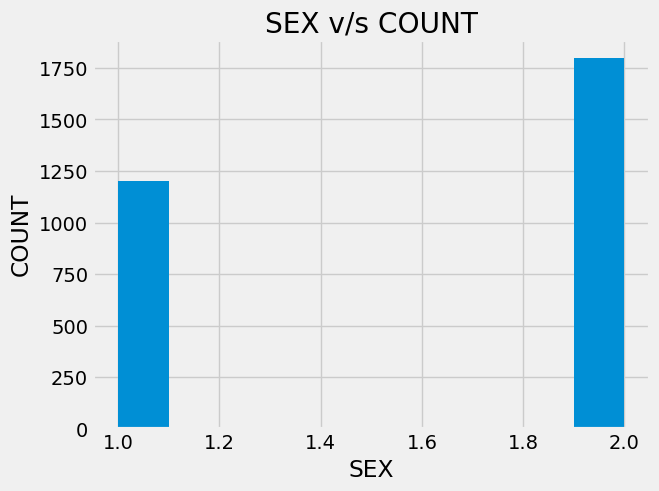

In [ ]:
plt.style.use('fivethirtyeight')
df['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

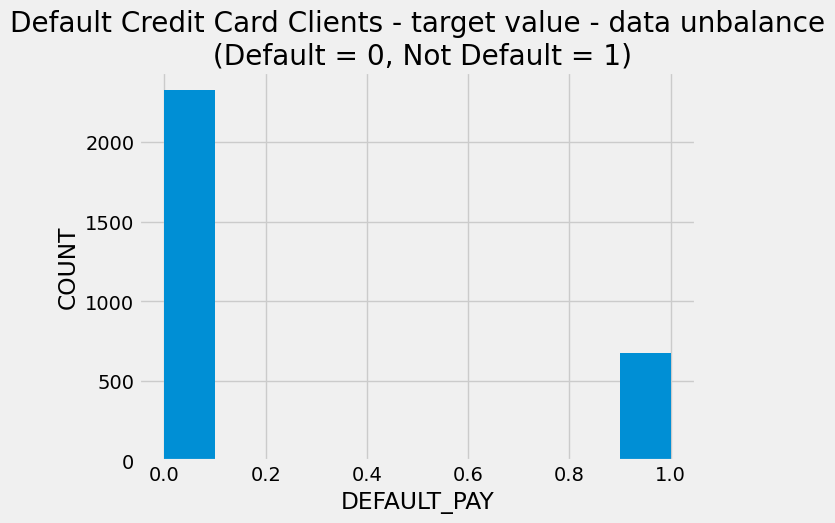

In [ ]:
plt.style.use('fivethirtyeight') #replicates style from fivethirtyeight
df['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

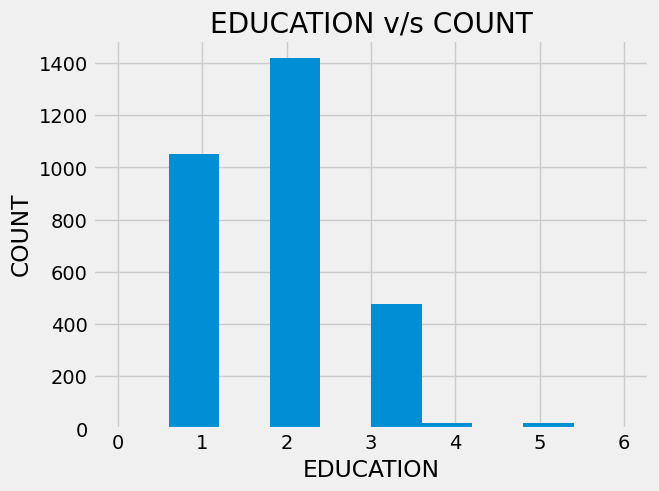

In [ ]:
plt.style.use('fivethirtyeight')
df['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

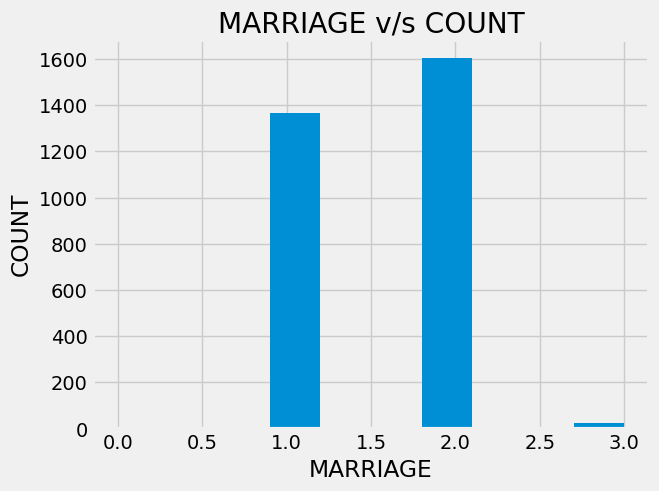

In [ ]:
plt.style.use('fivethirtyeight')
df['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

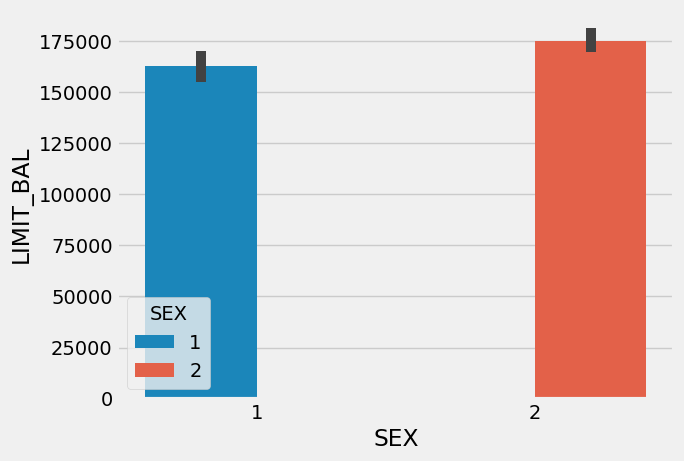

In [ ]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=df,hue='SEX')

<Axes: xlabel='SEX', ylabel='count'>

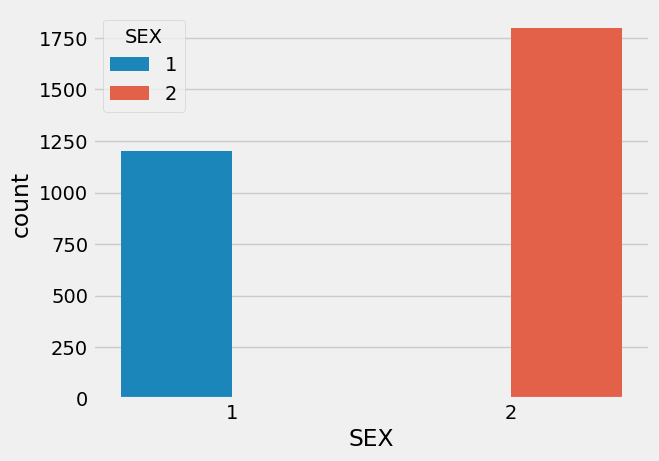

In [ ]:
sns.countplot(x='SEX',data=df,hue = 'SEX')

<Axes: xlabel='SEX', ylabel='count'>

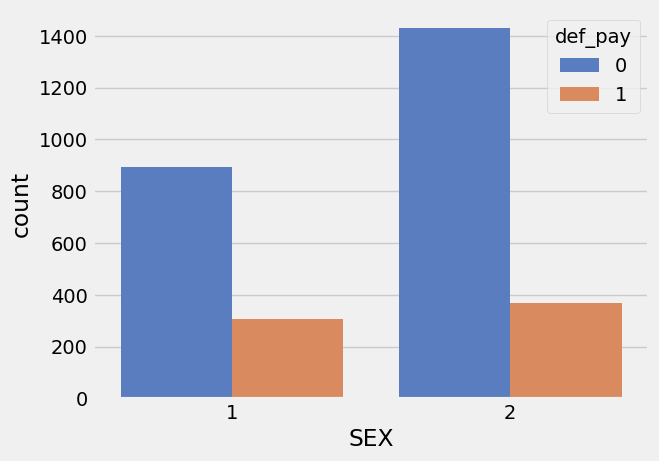

In [ ]:
# Checking the number of counts of defaulters and non defaulters sexwise
sns.countplot(x='SEX', data=df,hue="def_pay", palette="muted")

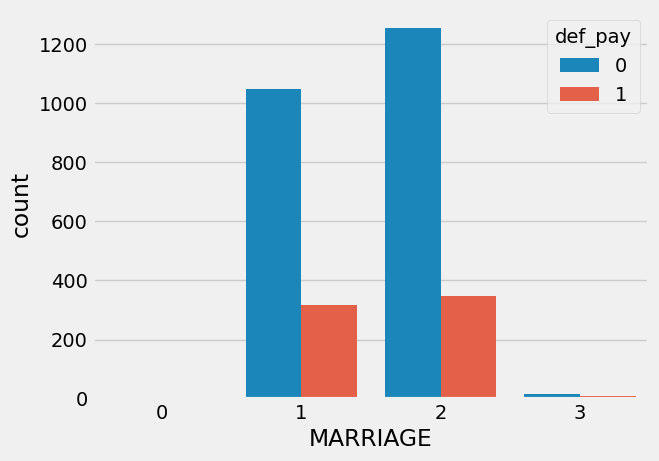

In [ ]:
g=sns.countplot(x="MARRIAGE", data=df,hue="def_pay")

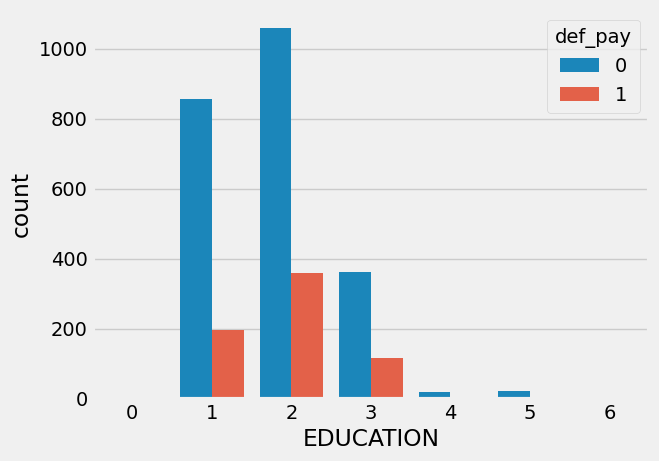

In [ ]:
g=sns.countplot(x="EDUCATION", data=df,hue="def_pay")

In [ ]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

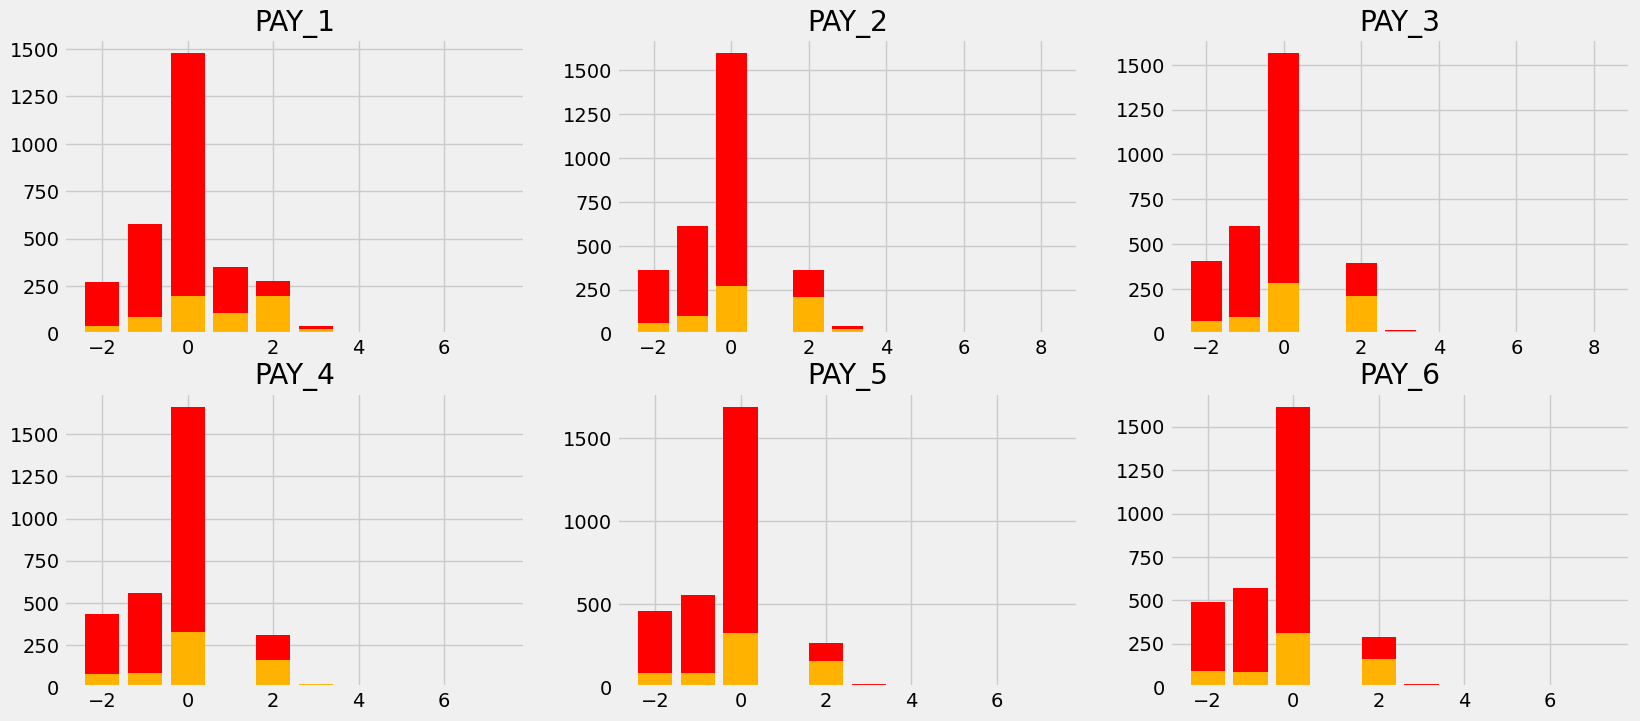

In [ ]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])




plt.show()
#figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

In [ ]:
import matplotlib
print(matplotlib.__version__)
import wordcloud
print(wordcloud.__version__)

3.7.1
1.9.2


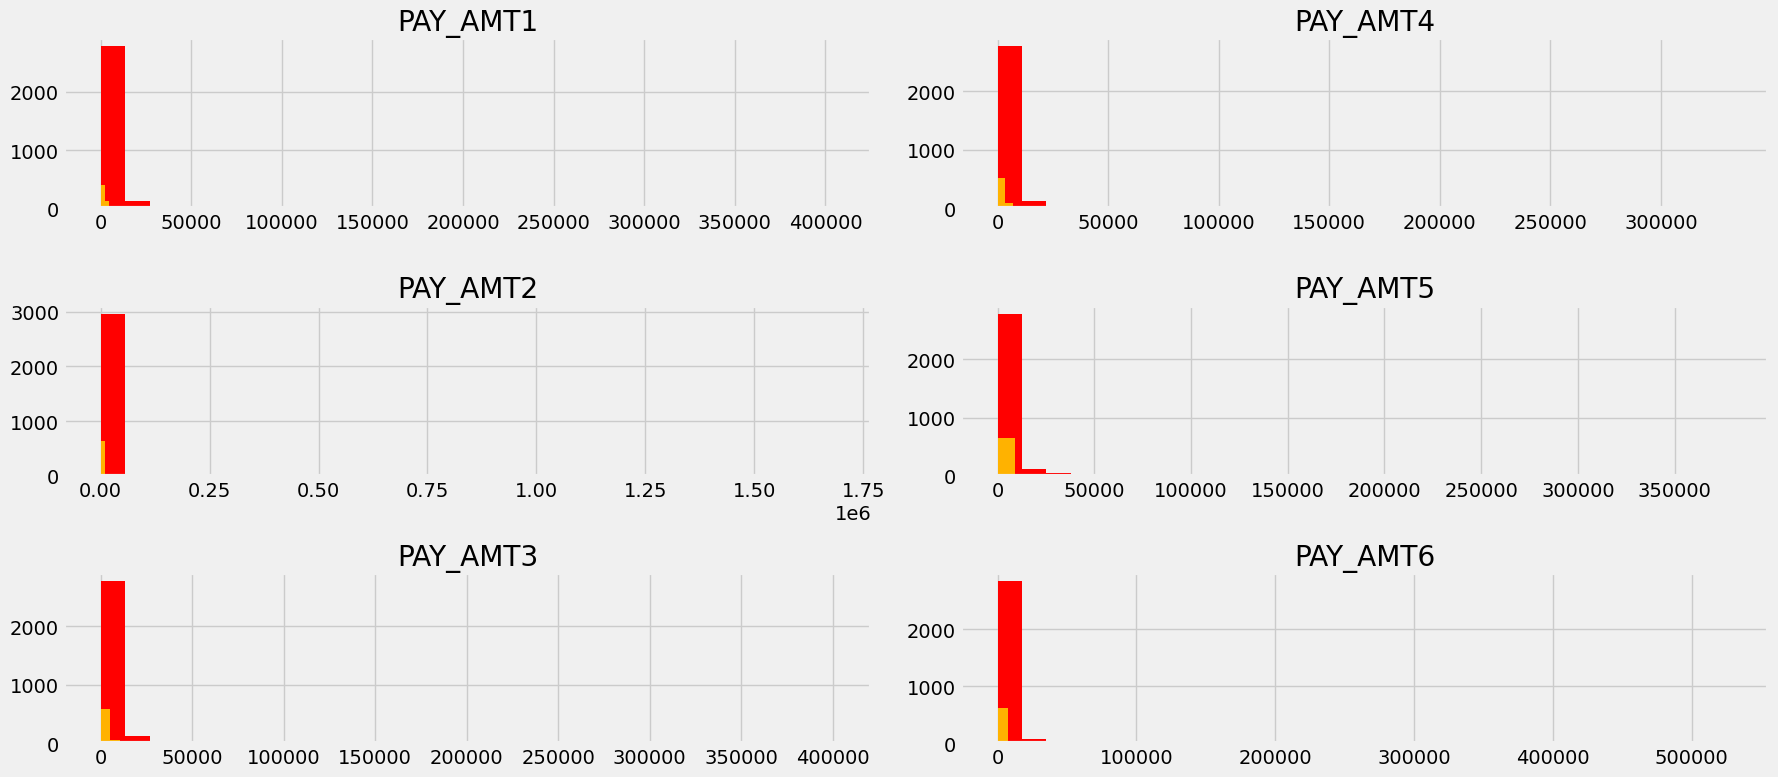

In [ ]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)

    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['def_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
   # ax[row,col].set_yscale('log', clip ='clip')
  #$plt.yscale('log',nonposy = 'clip')
plt.tight_layout()
plt.show()
#The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

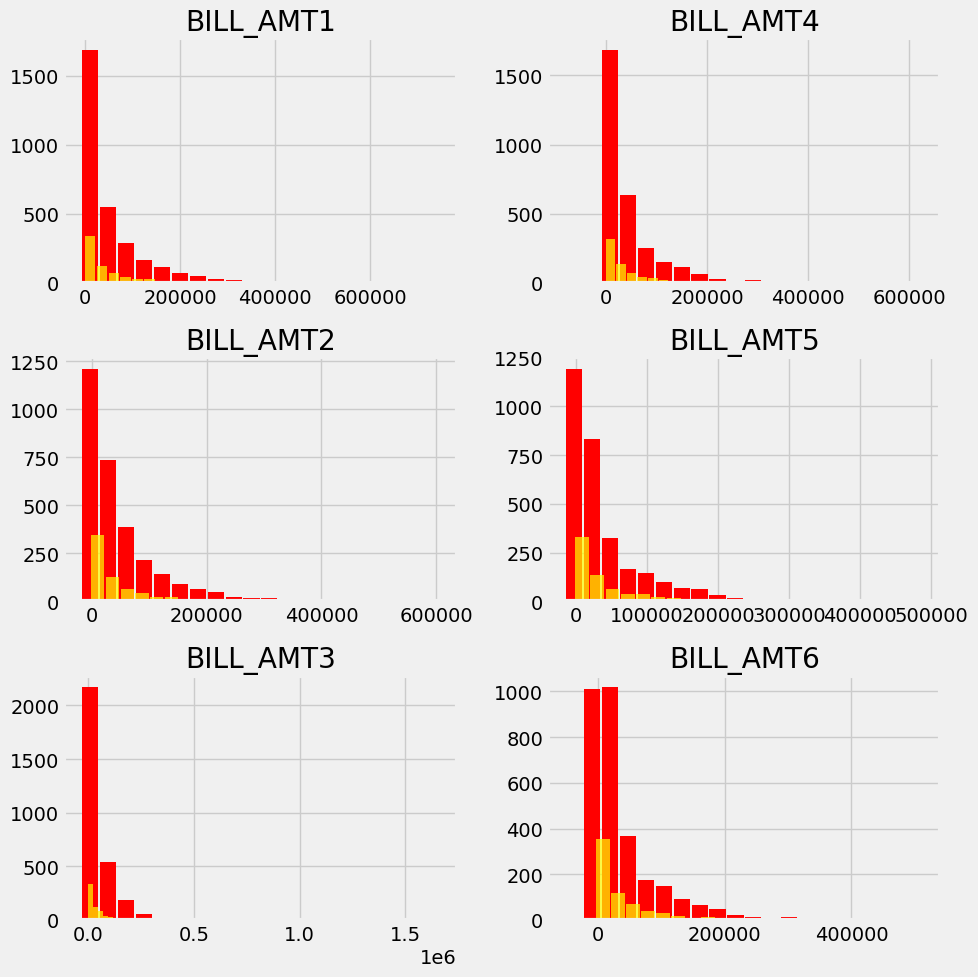

In [ ]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)

    ax[row,col].hist(df[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(df[bill_atm_columns[i]][(df['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    #ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

<Axes: xlabel='def_pay', ylabel='AGE'>

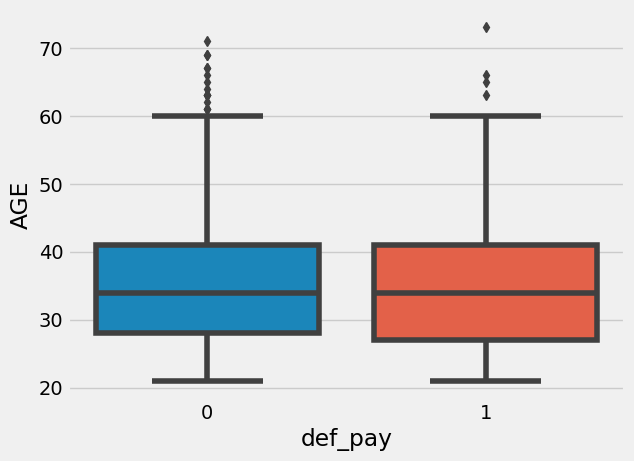

In [ ]:
sns.boxplot(x='def_pay',y='AGE',data=df)#,palette='rainbow')

<Axes: xlabel='def_pay', ylabel='AGE'>

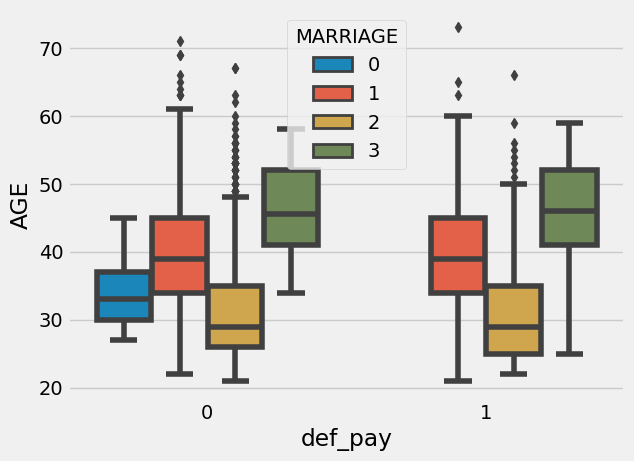

In [ ]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=df)

<Axes: xlabel='def_pay', ylabel='AGE'>

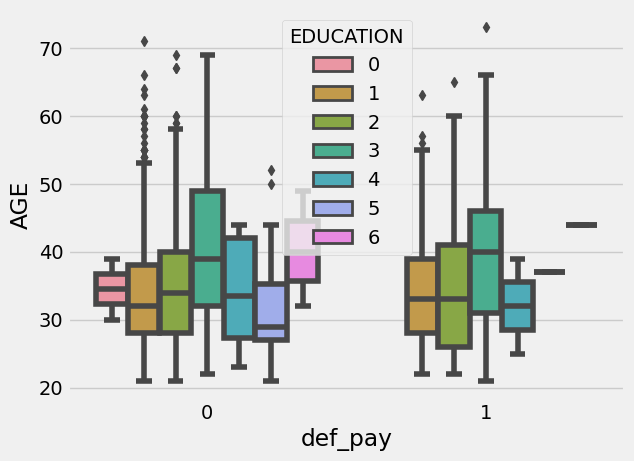

In [ ]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=df)

<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

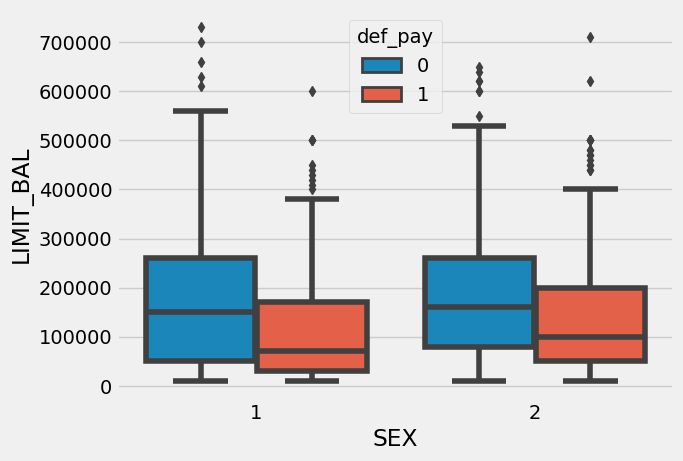

In [ ]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=df)#,palette="rainbow")

<Axes: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

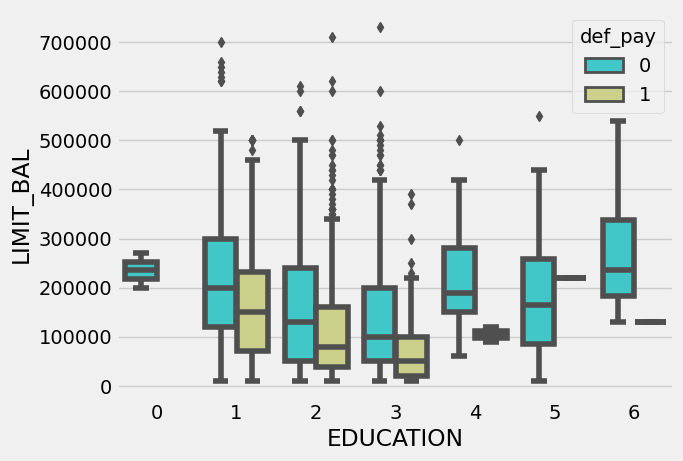

In [ ]:
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=df,palette="rainbow")

<Axes: xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

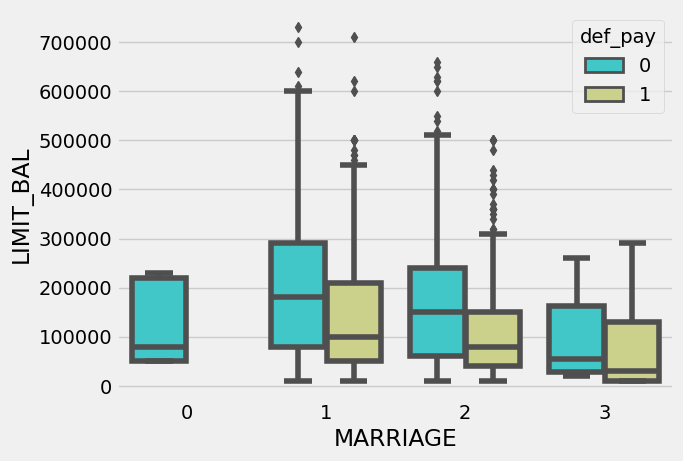

In [ ]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=df,palette="rainbow")

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

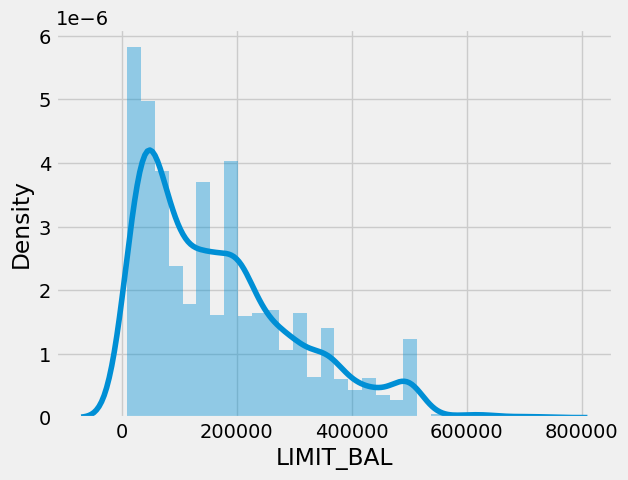

In [ ]:
sns.distplot(df['LIMIT_BAL'],kde=True,bins=30)

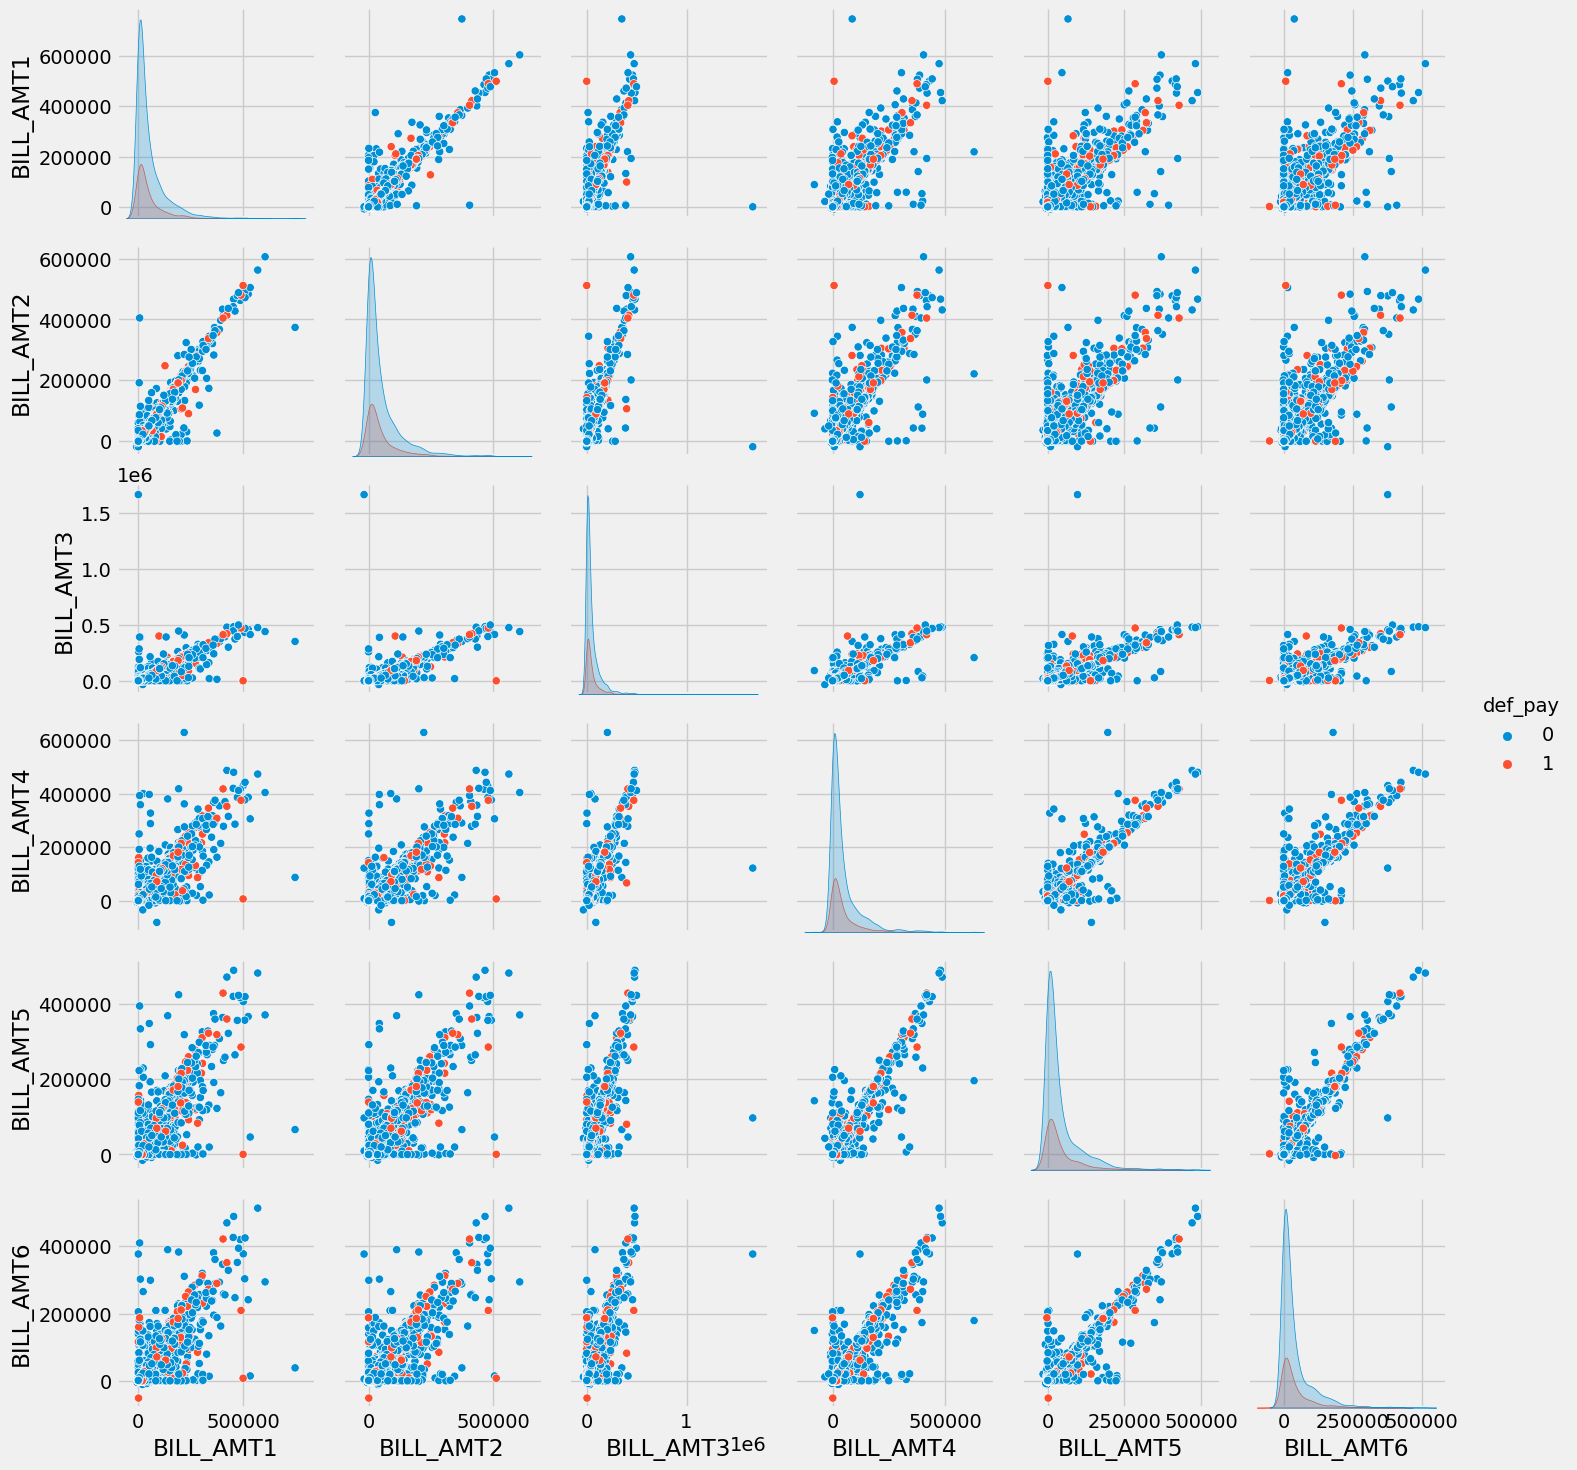

In [ ]:
# plot columns with similar names to check the correlation

sns.pairplot(df, vars=df.columns[11:17], kind='scatter',hue= 'def_pay')
#sns.pairplot(df, vars=df.columns[17:23],hue = 'def_pay')

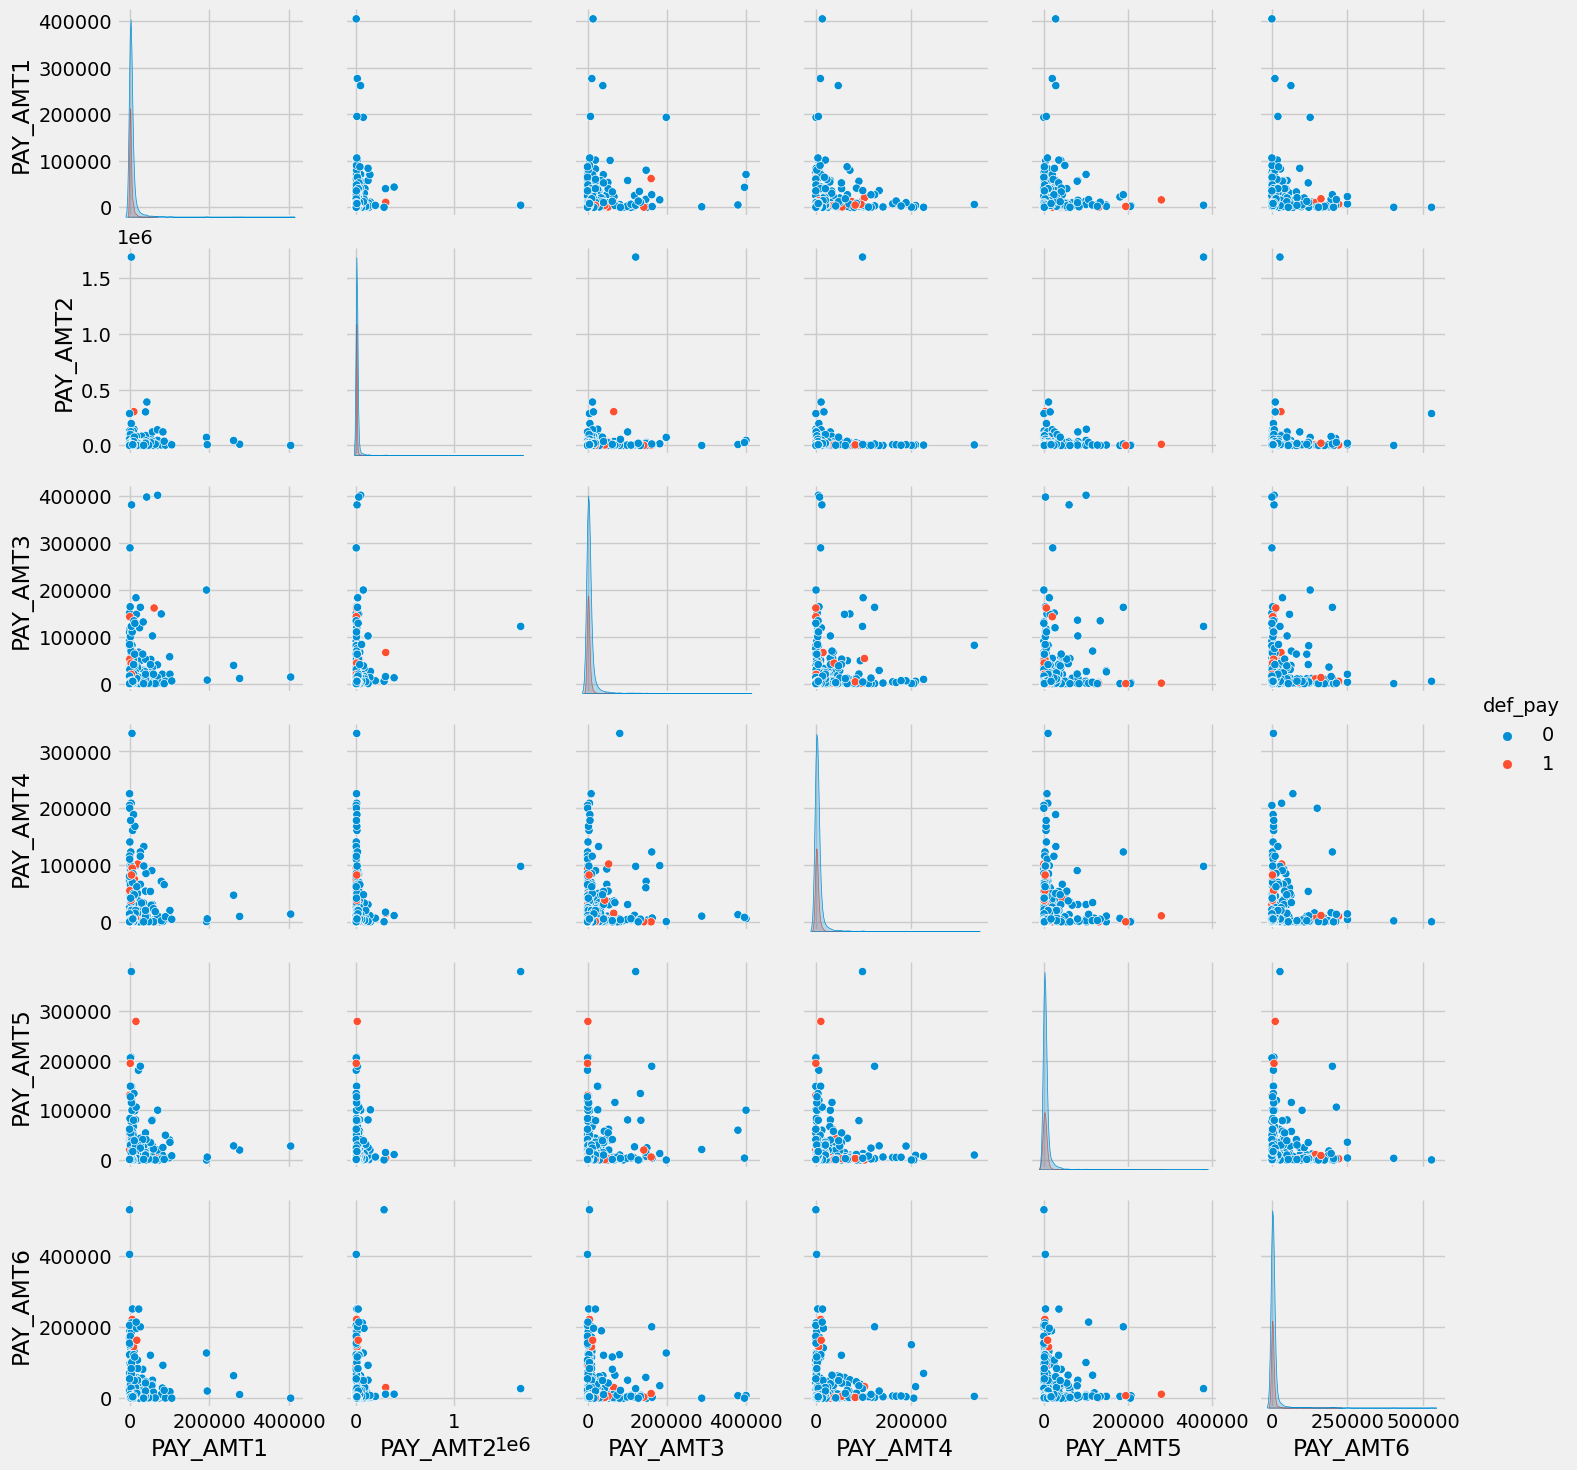

In [ ]:
sns.pairplot(df, vars=df.columns[17:23],hue = 'def_pay')

In [ ]:
#Step3: Observing Correlation between features of the Dataset
correlation = df.corr()

<Axes: >

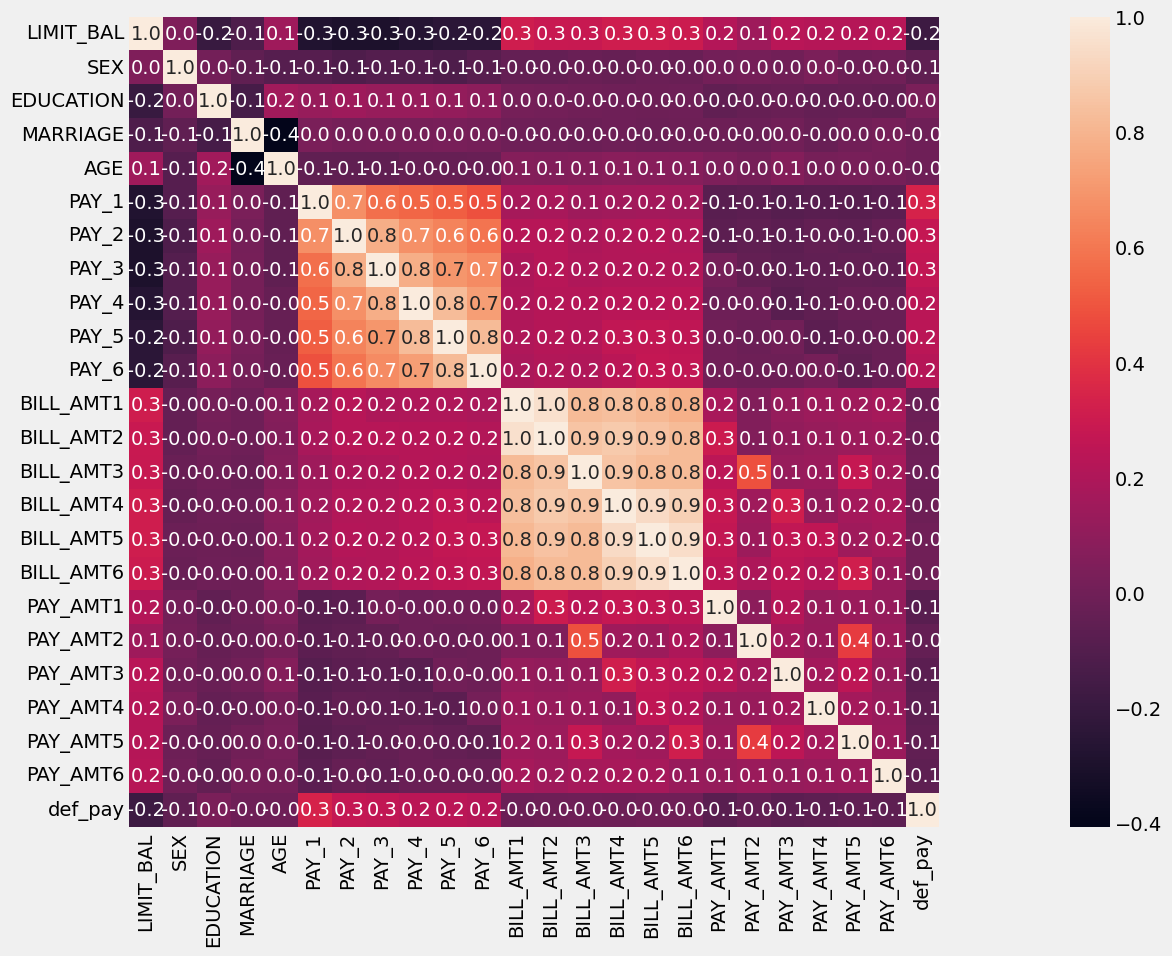

In [ ]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

<Axes: title={'center': 'Correlation with Default'}>

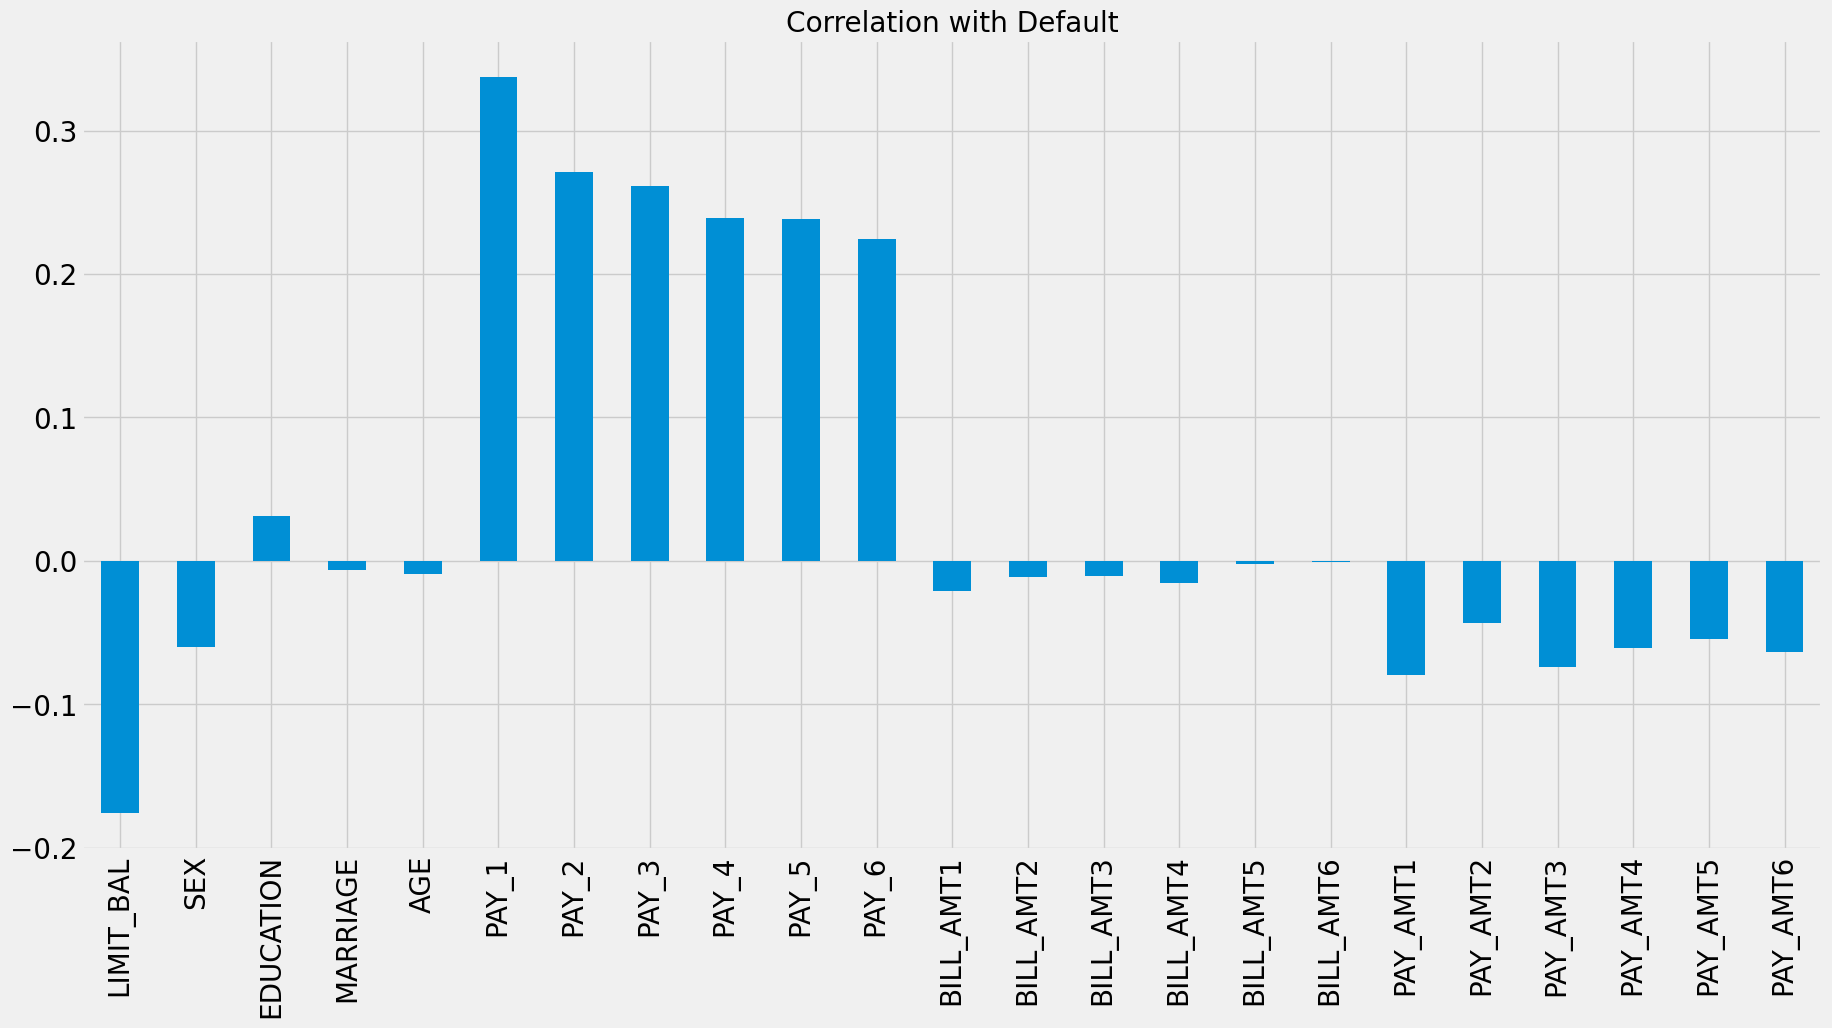

In [ ]:
X = df.drop(['def_pay'],axis=1)
X.corrwith(df['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default",
                                        fontsize = 20,rot = 90, grid = True)

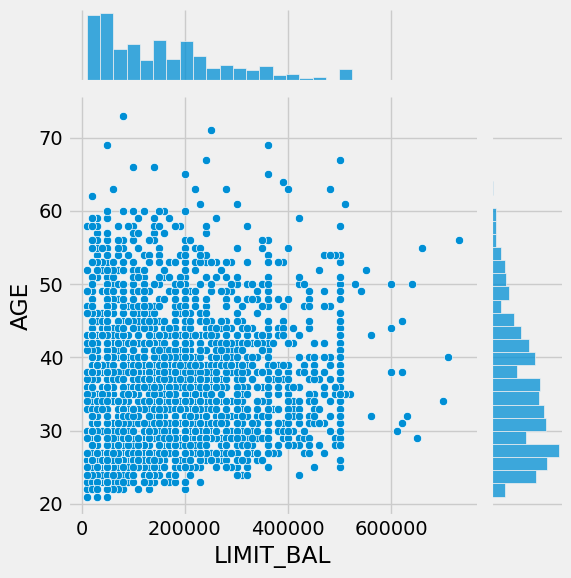

In [ ]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=df,kind="scatter")

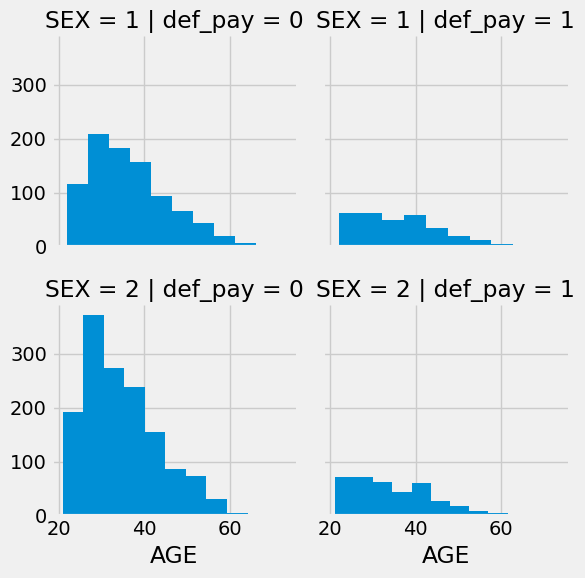

In [ ]:
#FACET GRID
g = sns.FacetGrid(df, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

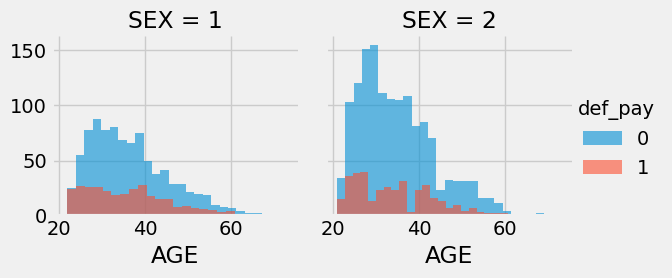

In [ ]:
g = sns.FacetGrid(df, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

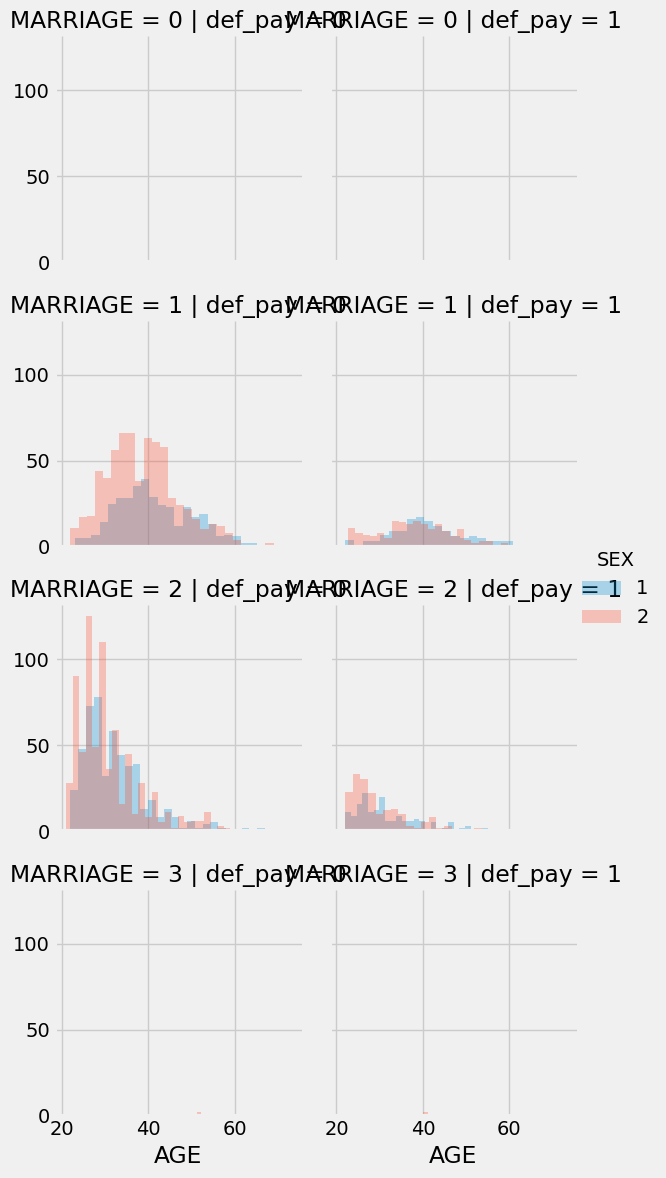

In [ ]:
g = sns.FacetGrid(df, col='def_pay',  row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25)
g.add_legend()

In [ ]:
# Data Cleaning
#EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
#MARRIAGE has a label 0 that is undocumented
#Data Transformation
#The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).
#The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)
#Thus is a good occasion to learn how to use the .loc function

In [ ]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()


2    1418
1    1051
3     479
4      52
Name: EDUCATION, dtype: int64

In [ ]:
df['EDUCATION'].value_counts(dropna = False)

2    1418
1    1051
3     479
4      52
Name: EDUCATION, dtype: int64

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    1603
1    1367
3      30
Name: MARRIAGE, dtype: int64

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [ ]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10881,50000.0,2,2,1,23,0,0,0,0,-1,...,-17250.0,20129.0,20502.0,2741.0,2079.0,2177.0,41608.0,713.0,837.0,0
20735,120000.0,1,1,1,49,0,0,0,0,0,...,117427.0,116637.0,115794.0,106000.0,5800.0,5700.0,4400.0,8421.0,0.0,0
17192,150000.0,2,2,1,31,2,0,0,0,0,...,109374.0,111279.0,125353.0,3872.0,5500.0,4005.0,3241.0,15500.0,4000.0,0
3392,350000.0,2,1,1,43,-2,-2,-2,-2,-2,...,0.0,0.0,1146.0,0.0,0.0,0.0,0.0,1146.0,54269.0,0
5263,210000.0,2,2,1,37,0,0,0,0,0,...,129871.0,131091.0,118405.0,8006.0,7009.0,5000.0,5000.0,17137.0,3863.0,0


In [ ]:
fil = (df.PAY_1 == -1) | (df.PAY_1==-2)
df.loc[fil,'PAY_1']=0
df.PAY_1.value_counts()
fil = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[fil,'PAY_2']=0
df.PAY_2.value_counts()
fil = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[fil,'PAY_3']=0
df.PAY_3.value_counts()
fil = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[fil,'PAY_4']=0
df.PAY_4.value_counts()
fil = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[fil,'PAY_5']=0
df.PAY_5.value_counts()
fil = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[fil,'PAY_6']=0
df.PAY_6.value_counts()

0    2678
2     289
3      16
4       8
7       5
5       2
6       2
Name: PAY_6, dtype: int64

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,0,0,0,0,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [ ]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10881,50000.0,2,2,1,23,0,0,0,0,0,...,-17250.0,20129.0,20502.0,2741.0,2079.0,2177.0,41608.0,713.0,837.0,0
20735,120000.0,1,1,1,49,0,0,0,0,0,...,117427.0,116637.0,115794.0,106000.0,5800.0,5700.0,4400.0,8421.0,0.0,0
17192,150000.0,2,2,1,31,2,0,0,0,0,...,109374.0,111279.0,125353.0,3872.0,5500.0,4005.0,3241.0,15500.0,4000.0,0
3392,350000.0,2,1,1,43,0,0,0,0,0,...,0.0,0.0,1146.0,0.0,0.0,0.0,0.0,1146.0,54269.0,0
5263,210000.0,2,2,1,37,0,0,0,0,0,...,129871.0,131091.0,118405.0,8006.0,7009.0,5000.0,5000.0,17137.0,3863.0,0


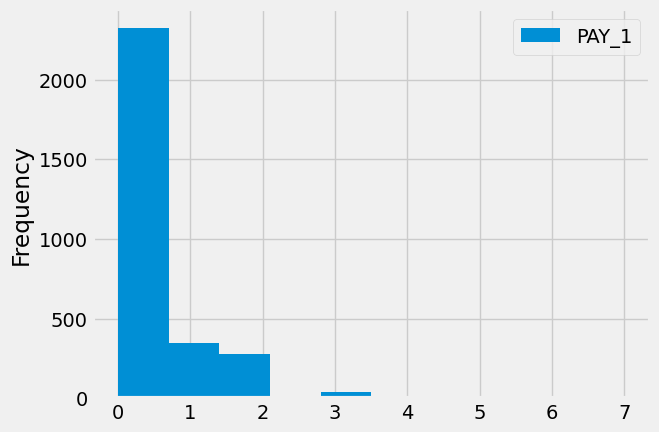

In [ ]:
df.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [ ]:
df['PAY_1'].describe()

count    3000.000000
mean        0.356667
std         0.750318
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: PAY_1, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 10748 to 5263
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  3000 non-null   float64
 1   SEX        3000 non-null   int64  
 2   EDUCATION  3000 non-null   int64  
 3   MARRIAGE   3000 non-null   int64  
 4   AGE        3000 non-null   int64  
 5   PAY_1      3000 non-null   int64  
 6   PAY_2      3000 non-null   int64  
 7   PAY_3      3000 non-null   int64  
 8   PAY_4      3000 non-null   int64  
 9   PAY_5      3000 non-null   int64  
 10  PAY_6      3000 non-null   int64  
 11  BILL_AMT1  3000 non-null   float64
 12  BILL_AMT2  3000 non-null   float64
 13  BILL_AMT3  3000 non-null   float64
 14  BILL_AMT4  3000 non-null   float64
 15  BILL_AMT5  3000 non-null   float64
 16  BILL_AMT6  3000 non-null   float64
 17  PAY_AMT1   3000 non-null   float64
 18  PAY_AMT2   3000 non-null   float64
 19  PAY_AMT3   3000 non-null   float64
 20  PAY_

In [ ]:
df.SEX.nunique()

2

In [ ]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000
mean,5296.085667,6.183706e+03,5821.387000,5248.272333,5126.510000,6045.457000
std,14514.026908,3.477270e+04,19460.071823,16310.734249,16318.431677,22901.376406
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,7.800000e+02,390.000000,324.500000,275.750000,166.750000
50%,2024.500000,2.003500e+03,1801.000000,1575.500000,1500.000000,1444.500000
75%,5000.000000,5.000000e+03,5000.000000,4302.250000,4275.000000,4076.500000
max,405016.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,528666.000000


In [ ]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,52425.881333,49871.214000,4.780043e+04,44218.980667,41287.998667,39590.259667
std,76222.585461,73459.589986,7.638279e+04,66762.288728,62381.525949,60739.019428
min,-8187.000000,-18088.000000,-3.404100e+04,-81334.000000,-15306.000000,-51443.000000
25%,3661.500000,2869.750000,2.836500e+03,2659.000000,1895.250000,1206.000000
50%,22592.500000,20750.500000,1.990650e+04,19280.000000,18243.500000,17324.000000
75%,69039.000000,64295.000000,5.903425e+04,52586.750000,50674.000000,49127.500000
max,746814.000000,605943.000000,1.664089e+06,628699.000000,489200.000000,513798.000000


In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [ ]:
#One Hot encoding for categorical variable
#categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   #'PAY_5','PAY_6']
#dataset[categorical_vars] = dataset[categorical_vars].astype(str)
#dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
#dataset.head()


In [ ]:
df.shape

(3000, 24)

In [ ]:
df.columns = df.columns.map(str.lower)

In [ ]:
df.head

<bound method NDFrame.head of        limit_bal  sex  education  marriage  age  pay_1  pay_2  pay_3  pay_4  \
ID                                                                            
10748   310000.0    1          3         1   32      0      0      0      0   
12574    10000.0    2          3         1   49      0      0      0      0   
29677    50000.0    1          2         1   28      0      0      0      0   
8857     80000.0    2          3         1   52      2      2      3      3   
21099   270000.0    1          1         2   34      1      2      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
10881    50000.0    2          2         1   23      0      0      0      0   
20735   120000.0    1          1         1   49      0      0      0      0   
17192   150000.0    2          2         1   31      2      0      0      0   
3392    350000.0    2          1         1   43      0      0      0      0   
5263    210000.0    2 

In [ ]:
# Feature Scaling of Numerical Attributes
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
df[col_to_norm] = df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [ ]:
df.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.053783,1,3,1,-0.367461,0,0,0,0,0,...,0.601548,0.264401,-0.418701,0.206656,-0.005284,-0.093612,-0.137863,-0.252916,-0.176676,0
12574,-1.207501,2,3,1,1.500055,0,0,0,0,2,...,-0.637127,-0.643727,-0.636604,-0.364955,-0.177862,-0.153848,-0.321822,-0.303052,-0.264022,1
29677,-0.905996,1,2,1,-0.806877,0,0,0,0,0,...,0.026307,-0.641130,0.072399,-0.364955,1.152628,-0.186124,-0.242106,2.381783,-0.203491,0
8857,-0.679868,2,3,1,1.829616,2,2,3,3,3,...,-0.051999,-0.023601,0.016742,-0.109987,-0.131841,-0.216962,-0.321822,-0.216142,-0.194145,1
21099,0.752279,1,1,2,-0.147753,1,2,0,0,2,...,-0.326151,-0.413621,-0.366337,-0.364955,-0.062810,-0.196403,-0.321822,-0.191626,-0.176676,0
17459,-0.227611,2,3,1,-0.587169,0,0,0,0,2,...,0.569399,0.380176,0.350043,-0.041076,-0.048285,0.364120,-0.321822,-0.178755,-0.163575,0
1477,0.224646,1,2,2,-1.026584,0,0,0,0,0,...,-0.422494,-0.459748,-0.543238,0.527916,-0.066146,-0.041702,-0.278898,-0.292142,-0.189210,0
5121,-0.152235,1,2,2,0.181808,0,0,0,0,0,...,0.310452,0.328918,0.319399,-0.192679,-0.105954,-0.104919,-0.186919,-0.191626,-0.176676,0
18339,-1.132124,2,2,2,-1.466000,0,0,0,0,0,...,-0.367229,-0.344230,-0.322487,-0.158224,-0.091544,-0.145008,-0.199183,-0.252794,-0.229826,0


In [ ]:
df.tail(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1248,-0.604491,2,2,2,-0.037900,0,0,0,0,0,...,-0.662445,-0.661973,-0.651918,-0.181171,-0.177862,-0.299195,-0.321822,-0.314207,-0.264022,0
8731,-1.056748,2,1,1,-1.466000,0,0,0,0,0,...,-0.327005,-0.282727,-0.277500,-0.226859,-0.120221,-0.196352,-0.199121,-0.314146,-0.189735,0
1756,-0.302987,1,3,1,-0.147753,0,0,0,0,0,...,-0.555990,-0.532009,-0.501973,-0.273925,-0.134717,-0.299195,-0.260502,-0.252916,-0.237906,0
13302,-0.453739,1,1,2,-1.026584,0,0,0,0,0,...,0.104613,0.144314,0.180108,0.048507,-0.120336,-0.145008,-0.199183,-0.191626,-0.133004,0
25687,-0.981372,2,2,2,-0.257607,0,0,0,2,0,...,-0.632798,-0.630244,-0.619331,-0.207908,-0.058006,-0.299195,-0.200470,-0.192913,-0.186503,0
10881,-0.905996,2,2,1,-1.356146,0,0,0,0,0,...,-0.920868,-0.339243,-0.314319,-0.176072,-0.118064,-0.187306,2.229562,-0.270507,-0.227468,0
20735,-0.378363,1,1,1,1.500055,0,0,0,0,0,...,1.096730,1.208075,1.254818,6.939542,-0.011037,-0.006239,-0.052016,0.201921,-0.264022,0
17192,-0.152235,2,2,1,-0.477315,2,0,0,0,0,...,0.976088,1.122170,1.412223,-0.098134,-0.019665,-0.093355,-0.123085,0.635798,-0.089331,0
3392,1.355288,2,1,1,0.840931,0,0,0,0,0,...,-0.662445,-0.661973,-0.633047,-0.364955,-0.177862,-0.299195,-0.321822,-0.243968,2.106056,0


In [ ]:
 ##Spiliting Dataset into training(70%) and test set(30%)

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [ ]:
X_train.shape

(2100, 23)

In [ ]:
X_test.shape

(900, 23)

In [ ]:
#Applying Machine Learning Algorithm for Classification Problem.

In [ ]:
#Logistic Regression
#In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results =pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.81,0.646018,0.357843,0.460568,0.650186


In [ ]:
#Stochastic Gradient Descent


Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [ ]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.801111,0.686567,0.22549,0.339483,0.597659


In [ ]:
#K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

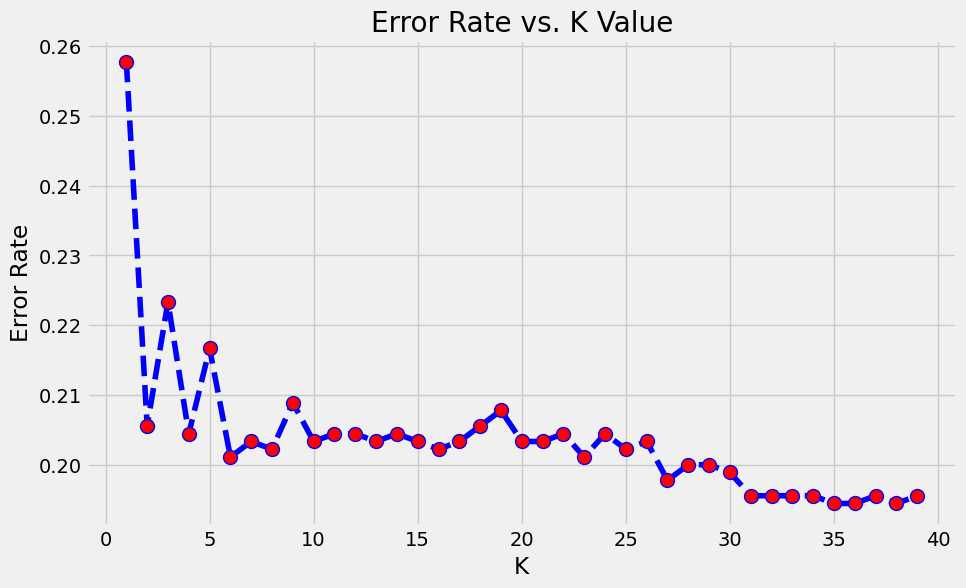

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.796667,0.589744,0.338235,0.429907,0.634635


In [ ]:
#Support Vector Machine


SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = scv.predict(X_test)



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

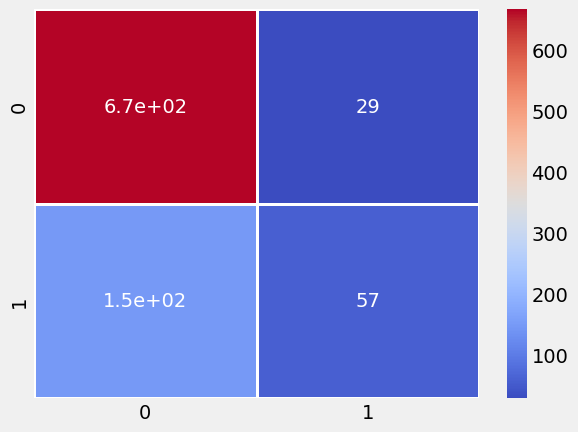

In [ ]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.804444,0.662791,0.279412,0.393103,0.618873


In [ ]:
#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)


GaussianNB()

In [ ]:
y_pred =naive_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[575, 121],
       [ 92, 112]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.763333,0.480687,0.54902,0.512586,0.687585


In [ ]:
#Decision Tree Classification


The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees
Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees
Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)


In [ ]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = dct.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [ ]:
cm

array([[567, 129],
       [132,  72]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.71,0.358209,0.352941,0.355556,0.583798


In [ ]:
#RANDOMFOREST

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)


In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[654,  42],
       [130,  74]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.808889,0.637931,0.362745,0.4625,0.6512


In [ ]:
#XGBOOST classifier
#It is Gradient Boosting Algorithm



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred =xgb.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.79,0.553191,0.382353,0.452174,0.645918


Model Optimization using Grid Search and K-Fold Cross validation
There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

1)Grid Search on Logistic Regression Model

In [ ]:
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [ ]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}


In [ ]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [ ]:
grid_search_log = grid_search_log.fit(X_train,y_train)

In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8252380952380951


In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
y_pred_log = grid_search_log.predict(X_test)


In [ ]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [ ]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.81,0.646018,0.357843,0.460568,0.650186


2)Grid Search on Stochastic Gradient Descent

In [ ]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.828095238095238


In [ ]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

{'alpha': 0.01, 'class_weight': None}

In [ ]:
y_pred_sgd = grid_search_sgd.predict(X_test)


In [ ]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)

In [ ]:
model =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.81,0.646018,0.357843,0.460568,0.650186
1,Stochastic Gradient Descent Tuned,0.81,0.654206,0.343137,0.450161,0.644988


<Axes: >

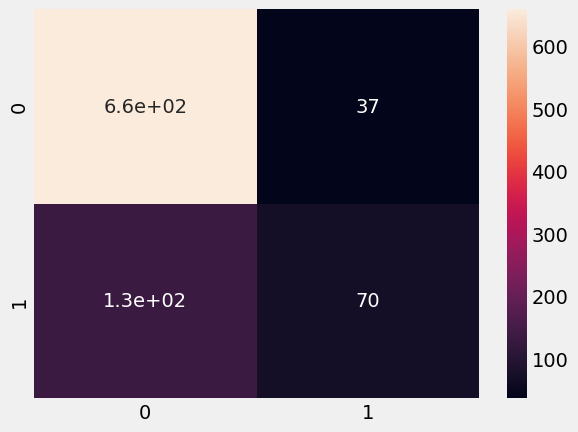

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)

3)Grid Search on SVM model w

In [ ]:
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [ ]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]

In [ ]:
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)


In [ ]:
import ipykernel
ipykernel.version_info

(5, 5, 6)

In [ ]:
grid_search_1 = grid_search_1.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8295238095238094


In [ ]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 1000, 'kernel': 'linear'}

In [ ]:
y_pred_svc =grid_search_1.predict(X_test)


In [ ]:
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.810000,0.646018,0.357843,0.460568,0.650186
1,Stochastic Gradient Descent Tuned,0.810000,0.654206,0.343137,0.450161,0.644988
2,SVC MODEL TUNED,0.815556,0.653226,0.397059,0.493902,0.667639


Grid Search on KNN Classifier...
We will be using the optimsed-for-performance implemented function of KNN provided by the scikit-learn package. We will also loop over k=1 to 30 and observe the recall in all these cases to find the best suitable value of K for our problem.

In [ ]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [ ]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)


In [ ]:
grid_search = grid_search.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8142857142857143


In [ ]:
best_parameters = grid_search.best_params_
best_parameters

{'leaf_size': 1, 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
y_pred_KNN = grid_search.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.810000,0.646018,0.357843,0.460568,0.650186
1,Stochastic Gradient Descent Tuned,0.810000,0.654206,0.343137,0.450161,0.644988
2,SVC MODEL TUNED,0.815556,0.653226,0.397059,0.493902,0.667639
3,KNN Model Tuned,0.800000,0.609091,0.328431,0.426752,0.633325


Grid Search on Decision Tree w

In [ ]:
#dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)


In [ ]:
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_dt.best_score_

In [ ]:

print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8271428571428571


In [ ]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [ ]:
y_pred_dct = grid_search_dt.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.810000,0.646018,0.357843,0.460568,0.650186
1,Stochastic Gradient Descent Tuned,0.810000,0.654206,0.343137,0.450161,0.644988
2,SVC MODEL TUNED,0.815556,0.653226,0.397059,0.493902,0.667639
3,KNN Model Tuned,0.800000,0.609091,0.328431,0.426752,0.633325
4,Decision Tree Tuned,0.814444,0.679612,0.343137,0.456026,0.647862


Grid Search on Random Forest Classifier w

In [ ]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)


In [ ]:
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8214285714285714


In [ ]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 400}

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.810000,0.646018,0.357843,0.460568,0.650186
1,Stochastic Gradient Descent Tuned,0.810000,0.654206,0.343137,0.450161,0.644988
2,SVC MODEL TUNED,0.815556,0.653226,0.397059,0.493902,0.667639
3,KNN Model Tuned,0.800000,0.609091,0.328431,0.426752,0.633325
4,Decision Tree Tuned,0.814444,0.679612,0.343137,0.456026,0.647862
5,Random Forest Tuned,0.800000,0.615385,0.313725,0.415584,0.628127


Grid Search on XGBOOST Classifier w

In [ ]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)


In [ ]:
grid_seaech_xgb = grid_search_xgb.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8242857142857142


In [ ]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2


{'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 50}

In [ ]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.810000,0.646018,0.357843,0.460568,0.650186
1,Stochastic Gradient Descent Tuned,0.810000,0.654206,0.343137,0.450161,0.644988
2,SVC MODEL TUNED,0.815556,0.653226,0.397059,0.493902,0.667639
3,KNN Model Tuned,0.800000,0.609091,0.328431,0.426752,0.633325
4,Decision Tree Tuned,0.814444,0.679612,0.343137,0.456026,0.647862
5,Random Forest Tuned,0.800000,0.615385,0.313725,0.415584,0.628127
6,XGBOOST Tuned,0.803333,0.613445,0.357843,0.452012,0.645876


ROC Curve


Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.

ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

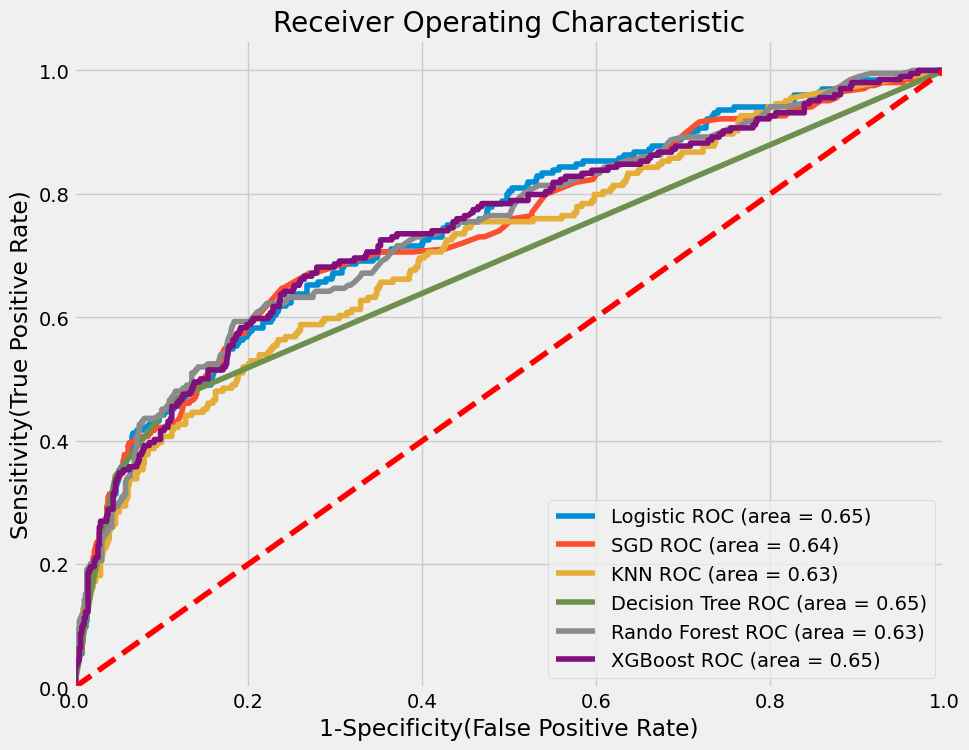

In [ ]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity
y_pred_log_p =grid_search_log.predict_proba(X_test)[:,1]
y_pred_sgd_p =grid_search_sgd.predict_proba(X_test)[:,1]
#y_pred_svc_p =grid_search_1.predict_proba(X_test)[:,1]
y_pred_knn_p =grid_search.predict_proba(X_test)[:,1]
y_pred_dt_p =grid_search_dt.predict_proba(X_test)[:,1]
y_pred_rf_p =grid_search_rf.predict_proba(X_test)[:,1]
y_pred_xgb_p =grid_search_xgb.predict_proba(X_test)[:,1]

model = [grid_search_log,grid_search_sgd,grid_search,grid_search_dt,grid_search_rf,grid_search_xgb]

models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic','SGD','KNN','Decision Tree','Rando Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(6)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

For Model Evaluation we are referreing Confusion Matrix
After we train a logistic regression model on some training data, we will evaluate the performance of the model on some test data. For this, we use the Confusion Matrix

the accuracy of the model : - ( TP + TN ) / Total

Here, TP stands for True Positive which are the cases in which we predicted yes and the actual value was true. TN stands for True Negative which are the cases in which we predicted no and the actual value was false.FP stands for False Positive which are the cases which we predicted yes and the actual value was False.FN stands for False Negative which are the cases which we predicted No and the actual value was true.

# **Conclusion**


1)Using a Logistic Regression classifier, we can predict with 82.5% accuracy, whether a customer is likely to default next month.

2)Using a Stochastic Gradient Descent classifier, we can predict with 83.33% accuracy, whether a customer is likely to default next month.

3)Using a Support Vector Machine classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

4)Using a K-Nearest Neighbour classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

5)Using a Decision Tree classifier, we can predict with 82.83% accuracy, whether a customer is likely to default next month.

6)Using a Random Forest classifier, we can predict with 81% accuracy, whether a customer is likely to default next month.

7)Using a XGBOOST classifier, we can predict with 82.16% accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

We found that using Stochastic Gradient Descent and Decision Tree are better.

Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.